<a href="https://colab.research.google.com/github/Alvarosc90/DataAnalisis/blob/main/MachineL_Alvaro_Soria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [756]:
import pandas as pd
import matplotlib.pyplot as plt

In [757]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

In [758]:
import warnings
warnings.filterwarnings('ignore')

In [759]:
from google.colab import drive

In [760]:
#montar drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


información adicional

Este conjunto de datos incluye datos para la estimación de niveles de obesidad en individuos de los países de México, Perú y Colombia, en función de sus hábitos alimentarios y condición física. Los datos contienen 17 atributos y 2111 registros, los registros están etiquetados con la variable de clase NObesity (Nivel de Obesidad), que permite clasificar los datos utilizando los valores de Peso Insuficiente, Peso Normal, Sobrepeso Nivel I, Sobrepeso Nivel II, Obesidad Tipo I. , Obesidad Tipo II y Obesidad Tipo III. El 77% de los datos se generaron de forma sintética utilizando la herramienta Weka y el filtro SMOTE, el 23% de los datos se recogieron directamente de los usuarios a través de una plataforma web.


Consumo frecuente de alimentos ricos en calorías (FAVC), Frecuencia de consumo de vegetales (FCVC), Número de comidas principales (NCP), Consumo de alimentos entre comidas (CAEC), Consumo de agua diario (CH20 ), y Consumo de alcohol (CALC). Los atributos relacionados con la condición física son: Monitoreo del consumo de calorías (SCC), Frecuencia de actividad física (FAF), Tiempo de uso de dispositivos tecnológicos (TUE), Transporte utilizado (MTRANS)

In [761]:
bd_22 = pd.read_csv('/content/gdrive/MyDrive/Bases de datos/regresion y clasificacion/ObesityDataSet_raw_and_data_sinthetic.csv')
bd_22.head(10)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,Male,29.0,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,Female,23.0,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,Male,22.0,1.64,53.0,no,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,Male,24.0,1.78,64.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Frequently,Public_Transportation,Normal_Weight
9,Male,22.0,1.72,68.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight


In [762]:
bd_22=bd_22.rename(columns={'Gender':'Genero','Age':'Edad','Height':'Altura','Weight':'Peso','family_history_with_overweight':'historia de familia con obesidad'})
bd_22.head(10)

,Genero,Edad,Altura,Peso,historia de familia con obesidad,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,Male,29.0,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,Female,23.0,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,Male,22.0,1.64,53.0,no,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,Male,24.0,1.78,64.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Frequently,Public_Transportation,Normal_Weight
9,Male,22.0,1.72,68.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight


In [763]:
bd_22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Genero                            2111 non-null   object 
 1   Edad                              2111 non-null   float64
 2   Altura                            2111 non-null   float64
 3   Peso                              2111 non-null   float64
 4   historia de familia con obesidad  2111 non-null   object 
 5   FAVC                              2111 non-null   object 
 6   FCVC                              2111 non-null   float64
 7   NCP                               2111 non-null   float64
 8   CAEC                              2111 non-null   object 
 9   SMOKE                             2111 non-null   object 
 10  CH2O                              2111 non-null   float64
 11  SCC                               2111 non-null   object 
 12  FAF   

In [764]:
#bd_22['NObeyesdad'] = bd_22.NObeyesdad.replace({"Normal_Weight": 1, "Overweight_Level_I":2, "Overweight_Level_II": 3, "Obesity_Type_I": 4, "Obesity_Type_II": 5, "Obesity_Type_III": 6, "Insufficient_Weight": 0})
#bd_22.head(10)

In [765]:
#Separamos en X e y
X = bd_22.drop(["NObeyesdad"], axis=1)
y = bd_22["NObeyesdad"]

In [766]:
bd_22["NObeyesdad"].value_counts()

Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: NObeyesdad, dtype: int64

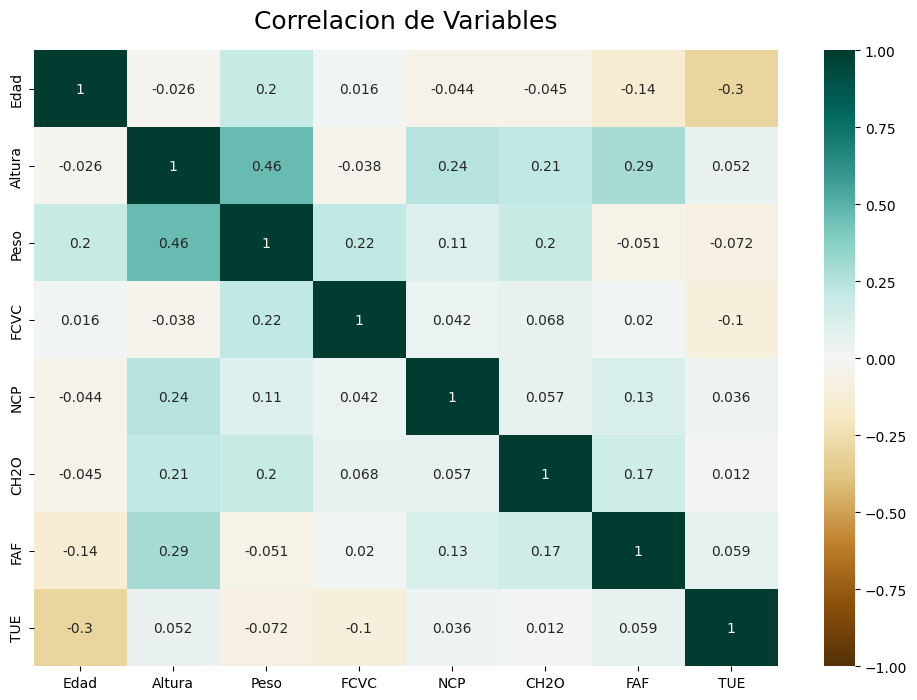

In [767]:
import seaborn as sns
plt.figure(figsize=(12,8))
heatmap= sns.heatmap(bd_22.corr(),vmin=-1,vmax=1,annot=True, cmap='BrBG')
heatmap.set_title('Correlacion de Variables', fontdict={'fontsize':18},pad=16);

In [768]:
# create dummy variables
bd_22 = pd.get_dummies(bd_22,columns=["Genero","historia de familia con obesidad","FAVC","CAEC","SMOKE","SCC","CALC","MTRANS"])
bd_22.head()

,Edad,Altura,Peso,FCVC,NCP,CH2O,FAF,TUE,NObeyesdad,Genero_Female,...,SCC_yes,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21.0,1.62,64.0,2.0,3.0,2.0,0.0,1.0,Normal_Weight,1,...,0,0,0,0,1,0,0,0,1,0
1,21.0,1.52,56.0,3.0,3.0,3.0,3.0,0.0,Normal_Weight,1,...,1,0,0,1,0,0,0,0,1,0
2,23.0,1.80,77.0,2.0,3.0,2.0,2.0,1.0,Normal_Weight,0,...,0,0,1,0,0,0,0,0,1,0
3,27.0,1.80,87.0,3.0,3.0,2.0,2.0,0.0,Overweight_Level_I,0,...,0,0,1,0,0,0,0,0,0,1
4,22.0,1.78,89.8,2.0,1.0,2.0,0.0,0.0,Overweight_Level_II,0,...,0,0,0,1,0,0,0,0,1,0


In [769]:
X = bd_22.drop(columns=["NObeyesdad"])
y = bd_22['NObeyesdad']

In [770]:
from sklearn.model_selection import train_test_split

In [771]:
#Separamos en train y test!
X_train, X_test,y_train, y_test = train_test_split(X,y,stratify=y,test_size=0.30,random_state=42)


In [772]:
X_train

,Edad,Altura,Peso,FCVC,NCP,CH2O,FAF,TUE,Genero_Female,Genero_Male,...,SCC_yes,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
90,25.000000,1.630000,93.000000,3.000000,4.000000,1.000000,2.000000,0.000000,1,0,...,0,0,0,0,1,0,0,0,1,0
513,21.243142,1.598019,44.845655,3.000000,1.726260,2.444125,1.318170,0.000000,1,0,...,0,0,0,0,1,0,0,0,1,0
1100,19.149706,1.699818,78.000000,1.096455,2.491315,2.450069,0.000000,0.726118,0,1,...,0,0,0,1,0,0,0,0,1,0
339,19.000000,1.530000,42.000000,2.000000,3.000000,1.000000,2.000000,0.000000,1,0,...,1,0,1,0,0,0,0,0,1,0
612,23.018443,1.584785,44.376637,2.204914,2.127797,2.120292,0.995735,0.000000,1,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1567,30.520854,1.784049,120.644178,2.499108,3.000000,2.040952,0.838739,0.489854,0,1,...,0,0,0,1,0,1,0,0,0,0
1336,21.011124,1.856315,118.183797,2.000000,3.000000,3.000000,0.788585,1.220029,0,1,...,0,0,0,1,0,0,0,0,1,0
609,19.979810,1.753360,54.997374,2.000000,3.494849,2.976672,1.949070,2.000000,0,1,...,0,0,0,0,1,0,0,0,1,0
1659,23.141402,1.849307,121.658729,3.000000,2.510135,1.693362,0.769709,0.000000,0,1,...,0,0,0,1,0,0,0,0,1,0


In [773]:
X_test

,Edad,Altura,Peso,FCVC,NCP,CH2O,FAF,TUE,Genero_Female,Genero_Male,...,SCC_yes,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
332,27.000000,1.850000,75.000000,2.000000,1.000000,2.000000,1.000000,0.000000,0,1,...,0,0,0,0,1,0,0,0,0,1
1235,23.365649,1.757691,95.361795,2.000000,3.000000,3.000000,3.000000,2.000000,0,1,...,0,0,0,0,1,0,0,0,1,0
16,27.000000,1.930000,102.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0,1,...,0,0,0,1,0,0,0,0,1,0
1214,25.706285,1.585547,80.351263,2.000000,1.000000,2.000000,0.000000,0.000000,1,0,...,0,0,0,1,0,0,0,0,1,0
521,19.000000,1.564199,42.096062,3.000000,1.894384,2.456581,1.596576,0.997400,1,0,...,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,19.000000,1.510000,45.000000,2.000000,4.000000,1.000000,3.000000,0.000000,1,0,...,0,0,0,1,0,0,0,0,1,0
1576,26.957645,1.780731,112.957922,2.263245,3.000000,2.092509,0.000000,1.836853,0,1,...,0,0,0,1,0,1,0,0,0,0
1219,24.079524,1.733439,97.911865,2.000000,3.000000,2.843675,1.309304,1.338655,0,1,...,0,0,0,0,1,0,0,0,1,0
1771,25.666680,1.798580,117.933290,2.037042,3.000000,2.436990,1.016254,0.020044,0,1,...,0,0,0,1,0,0,0,0,1,0


In [774]:
y_train

90          Obesity_Type_II
513     Insufficient_Weight
1100    Overweight_Level_II
339     Insufficient_Weight
612     Insufficient_Weight
               ...         
1567        Obesity_Type_II
1336         Obesity_Type_I
609     Insufficient_Weight
1659        Obesity_Type_II
237           Normal_Weight
Name: NObeyesdad, Length: 1477, dtype: object

In [775]:
y_test

332           Normal_Weight
1235         Obesity_Type_I
16      Overweight_Level_II
1214         Obesity_Type_I
521     Insufficient_Weight
               ...         
445           Normal_Weight
1576        Obesity_Type_II
1219         Obesity_Type_I
1771        Obesity_Type_II
50            Normal_Weight
Name: NObeyesdad, Length: 634, dtype: object

In [776]:
#Creamos un arbol de decisión sencillo y lo fiteamos
trees = DecisionTreeClassifier(random_state=42)
trees.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [777]:
y_test_pred = trees.predict(X_test)

In [778]:
accuracy_score(y_test,y_test_pred)

0.9211356466876972

In [779]:
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[81,  1,  0,  0,  0,  0,  0],
       [11, 52,  0,  0,  0, 18,  5],
       [ 0,  0, 96,  2,  0,  0,  8],
       [ 0,  0,  1, 86,  1,  0,  1],
       [ 0,  0,  0,  1, 96,  0,  0],
       [ 1,  3,  0,  0,  0, 79,  4],
       [ 0,  2,  7,  2,  0,  3, 73]])

In [780]:
print(classification_report(y_test,y_test_pred))

                     precision    recall  f1-score   support

Insufficient_Weight       0.94      0.89      0.91        82
      Normal_Weight       0.81      0.86      0.84        86
     Obesity_Type_I       0.87      0.97      0.92       106
    Obesity_Type_II       0.99      0.94      0.97        89
   Obesity_Type_III       1.00      0.99      0.99        97
 Overweight_Level_I       0.89      0.90      0.89        87
Overweight_Level_II       0.97      0.87      0.92        87

           accuracy                           0.92       634
          macro avg       0.92      0.92      0.92       634
       weighted avg       0.92      0.92      0.92       634



In [781]:
#Creamos un random forest
model = RandomForestClassifier(random_state=42, n_estimators=100,
                               class_weight="balanced", max_features="log2")

In [782]:
model.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', max_features='log2',
                       random_state=42)

In [783]:
y_pred = model.predict(X_test)

In [784]:
accuracy_score(y_test,y_pred)

0.9116719242902208

In [785]:
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[75,  7,  0,  0,  0,  0,  0],
       [ 1, 76,  1,  0,  0,  6,  2],
       [ 0,  5, 98,  0,  0,  1,  2],
       [ 0,  0,  1, 88,  0,  0,  0],
       [ 0,  1,  0,  0, 96,  0,  0],
       [ 0, 13,  1,  0,  0, 72,  1],
       [ 0,  8,  4,  0,  0,  2, 73]])

In [786]:
print(classification_report(y_test,y_test_pred))

                     precision    recall  f1-score   support

Insufficient_Weight       0.94      0.89      0.91        82
      Normal_Weight       0.81      0.86      0.84        86
     Obesity_Type_I       0.87      0.97      0.92       106
    Obesity_Type_II       0.99      0.94      0.97        89
   Obesity_Type_III       1.00      0.99      0.99        97
 Overweight_Level_I       0.89      0.90      0.89        87
Overweight_Level_II       0.97      0.87      0.92        87

           accuracy                           0.92       634
          macro avg       0.92      0.92      0.92       634
       weighted avg       0.92      0.92      0.92       634



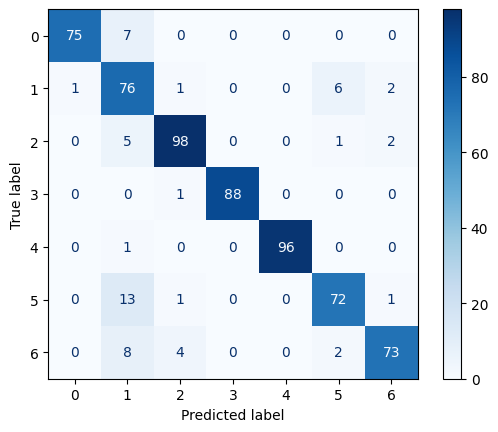

In [787]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat) #display_labels=[7,7]
disp.plot(cmap=plt.cm.Blues)

In [788]:
# Creamos un modelo SVC
modelo = SVC(C=0.1,kernel='rbf',random_state=42)

In [789]:
modelo.fit(X_train,y_train)

SVC(C=0.1, random_state=42)

In [790]:
accuracy_score(y_test,y_pred)

0.9116719242902208

In [791]:
# Creamos un modelo de LR
model_lr = LogisticRegression()

In [792]:
model_lr.fit(X_train,y_train)

LogisticRegression()

In [793]:
LogisticRegression()

LogisticRegression()

In [794]:
y_pred = model_lr.predict(X_test)

In [795]:
accuracy_score(y_test,y_pred)

0.6719242902208202

In [796]:
# Creamos el modelo KNN
modelo = KNeighborsClassifier()

In [797]:
modelo.fit(X_train,y_train)

KNeighborsClassifier()

In [798]:
y_pred = modelo.predict(X_test)

In [799]:
accuracy_score(y_test,y_pred)

0.88801261829653

In [800]:
print("Feature Selecction:")

for i, feature in enumerate(range(X.shape[1])):
  print(f"feature {feature}: {trees.feature_importances_[i]: .2f}")

Feature Selecction:
feature 0:  0.03
feature 1:  0.24
feature 2:  0.48
feature 3:  0.01
feature 4:  0.02
feature 5:  0.01
feature 6:  0.00
feature 7:  0.01
feature 8:  0.00
feature 9:  0.16
feature 10:  0.00
feature 11:  0.00
feature 12:  0.00
feature 13:  0.02
feature 14:  0.00
feature 15:  0.01
feature 16:  0.01
feature 17:  0.00
feature 18:  0.00
feature 19:  0.00
feature 20:  0.00
feature 21:  0.00
feature 22:  0.00
feature 23:  0.00
feature 24:  0.00
feature 25:  0.00
feature 26:  0.00
feature 27:  0.00
feature 28:  0.00
feature 29:  0.00
feature 30:  0.00


In [801]:
# Matriz Confusión:
conf_mat = confusion_matrix(y_test, y_test_pred)
conf_mat

array([[ 73,   9,   0,   0,   0,   0,   0],
       [  5,  74,   0,   0,   0,   7,   0],
       [  0,   0, 103,   1,   0,   1,   1],
       [  0,   0,   5,  84,   0,   0,   0],
       [  0,   0,   1,   0,  96,   0,   0],
       [  0,   8,   0,   0,   0,  78,   1],
       [  0,   0,   9,   0,   0,   2,  76]])

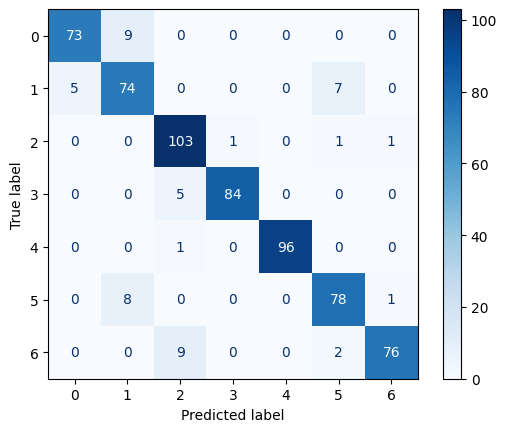

In [802]:
# Permite visualizar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat) #display_labels=[7,7]
disp.plot(cmap=plt.cm.Blues)

In [ ]:
from sklearn import tree

fig, ax= plt.subplots(figsize=(12,12))
tree.plot_tree(trees,filled=True)#, feature_names=x_names, class_names= y_names